In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([7 ,2  , 5 , 5 , 6 , 5 ])
y = np.array([2 ,5  , 4 , 2,  6 , 5])
anotasi = ["0","1","2","3","4","5"]

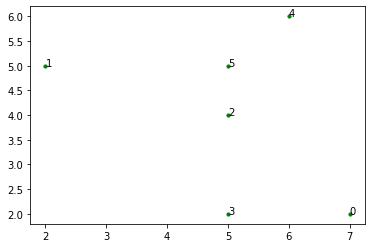

In [3]:
for i, label in enumerate(anotasi):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y, s=10, color='green')
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 3

# maximum generation
N = 20

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[0, 5, 2, 2, 4, 3],
       [5, 0, 3, 4, 4, 3],
       [2, 3, 0, 2, 2, 1],
       [2, 4, 2, 0, 4, 3],
       [4, 4, 2, 4, 0, 1],
       [3, 3, 1, 3, 1, 0]])

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    #hidupkan nomor 1 jika memulai dari awal | hidupkan nomor 2 jika memulai dari weight yang sudah ada
    #[1]
    for i in range(n):
        pop[i] = np.random.permutation(m)

    pop = pd.DataFrame(pop)  

    #[2]
    # oo = pd.read_csv('/content/weight.csv') #membaca file weight
    # for i in range(n):
    #     pop[i] = oo.loc[i].values.tolist() #ini dalam bentuk list yang akan menggantikan zeros dengan nilai yang ada di weight
    # pop = pd.DataFrame(pop) #kalau oo[1] -> itu kolom | kalau oo.loc[1] -> itu baris | .values.tolist mengubah ke list

    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
def crossover(pop):
    popc = pop.copy()
    for o in range(n):
        kposition = np.random.permutation(n)
        acakkrom1 = kposition[0]
        acakkrom2 = kposition[1] 
        
        gposition = np.random.permutation(m)
        acakgen1 = gposition[0]
        acakgen2 = gposition[1]
        acakgen3 = gposition[2]

        isiindex1 = popc.at[acakkrom1,acakgen1] #memilih 1 jenis kromoson, dipilih acak genya, dijadikan sample untuk persilangan
        isiindex2 = popc.at[acakkrom1,acakgen2]
        isiindex3 = popc.at[acakkrom1,acakgen3]

        parent1 = popc.loc[acakkrom1]
        parent2 = popc.loc[acakkrom2]
        childP1 = [isiindex1,isiindex2,isiindex3] #seharusnya ini menunjukkan hasil dari index, bukan indexnya

        for i in range(n,m): #kromoson/baris(n), gen/column(m)
            childP1.append(parent1[i])

        childP2 = [item for item in parent2 if item not in childP1]

        res = []
        for i in childP1:
            if i not in res:
                res.append(i)

        child = res + childP2
        popc.loc[o] = child

    
    return popc

In [9]:
def mutation(pop):
    popm = pop.copy()
    
    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [10]:
def combinePopulation(pop, popm, popc):
    popAll = pop.copy()
    popAll = popAll.append(popm)
    popAll = popAll.append(popc)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [11]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [12]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [13]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = 7 #ini diganti di sumur
    b[m] = 3

    for i, label in enumerate(anotasi):
      plt.annotate(label, (a[i], b[i]))
    
    plt.plot(a, b, color='yellow', marker = 'o')
    plt.show()

Solusi pada populasi awal
   0  1  2  3  4  5  fitness
0  1  0  2  3  4  5       17


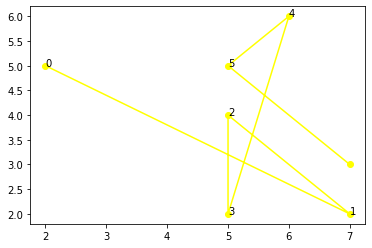


Solusi terbaik pada populasi generasi ke-1
   0  1  2  3  4  5  fitness
0  1  4  2  3  0  5       16


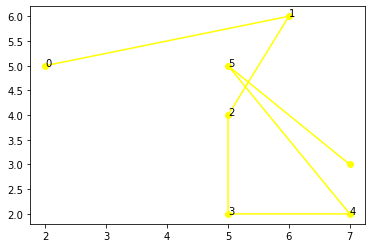


Solusi terbaik pada populasi generasi ke-2
   0  1  2  3  4  5  fitness
0  1  4  5  3  0  2       15


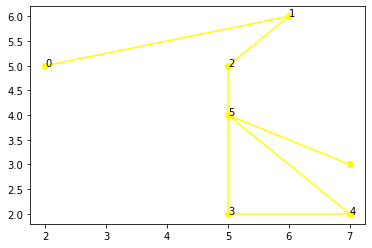


Solusi terbaik pada populasi generasi ke-3
   0  1  2  3  4  5  fitness
0  1  4  5  3  0  2       15


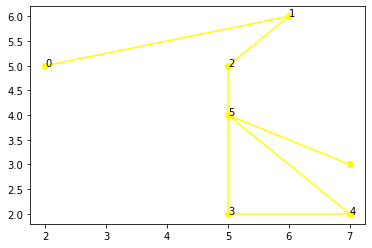


Solusi terbaik pada populasi generasi ke-4
   0  1  2  3  4  5  fitness
0  1  4  5  3  0  2       15


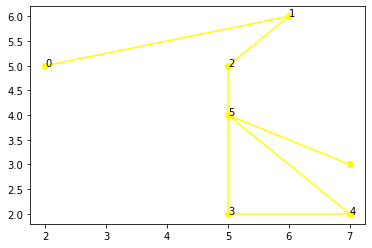


Solusi terbaik pada populasi generasi ke-5
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


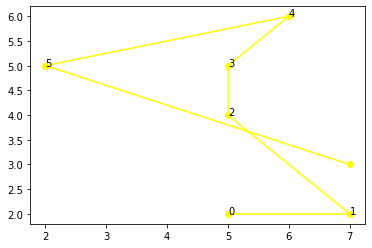


Solusi terbaik pada populasi generasi ke-6
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


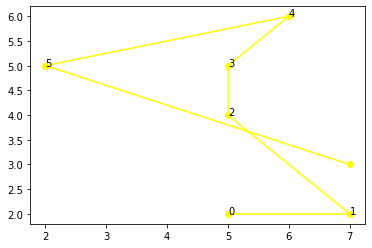


Solusi terbaik pada populasi generasi ke-7
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


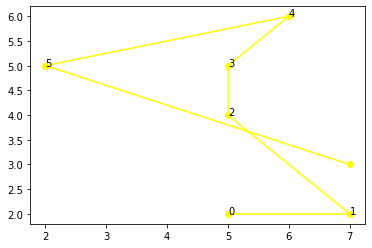


Solusi terbaik pada populasi generasi ke-8
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


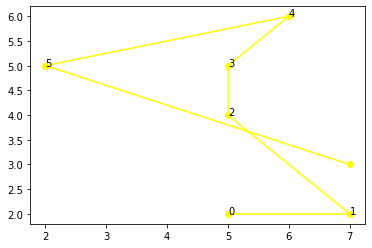


Solusi terbaik pada populasi generasi ke-9
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


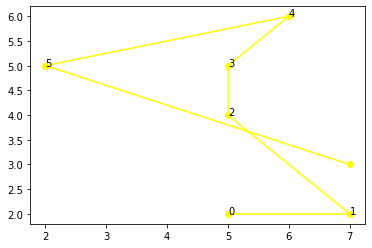


Solusi terbaik pada populasi generasi ke-10
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


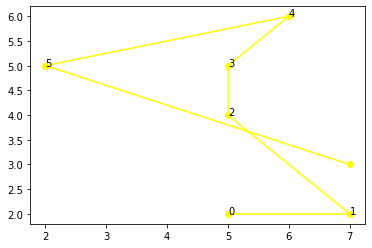


Solusi terbaik pada populasi generasi ke-11
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


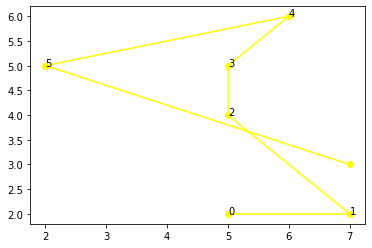


Solusi terbaik pada populasi generasi ke-12
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


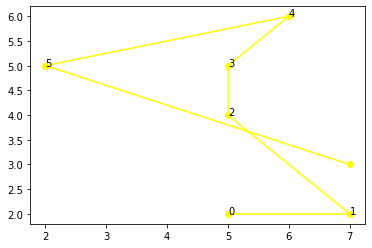


Solusi terbaik pada populasi generasi ke-13
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


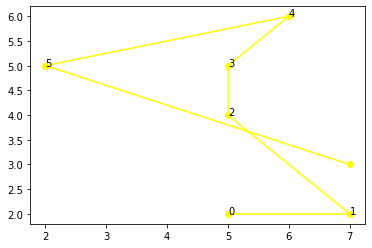


Solusi terbaik pada populasi generasi ke-14
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


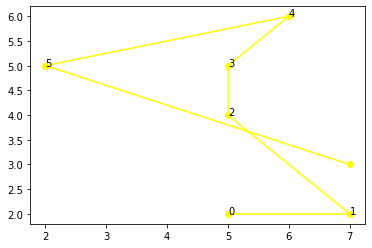


Solusi terbaik pada populasi generasi ke-15
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


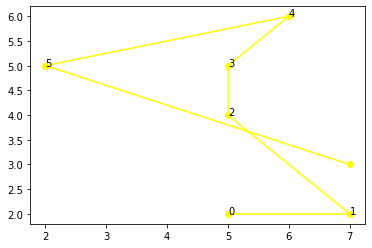


Solusi terbaik pada populasi generasi ke-16
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


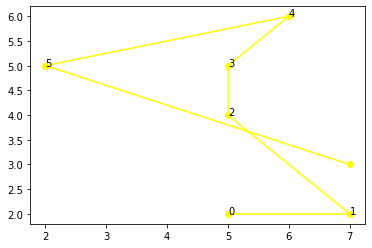


Solusi terbaik pada populasi generasi ke-17
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


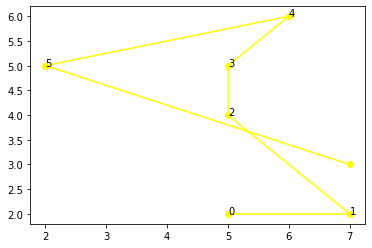


Solusi terbaik pada populasi generasi ke-18
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


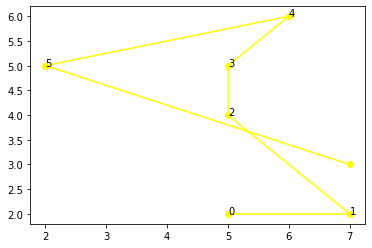


Solusi terbaik pada populasi generasi ke-19
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


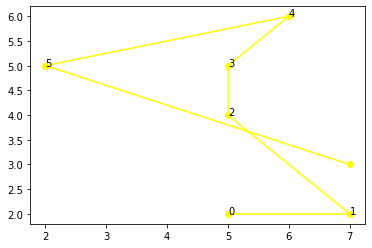


Solusi terbaik pada populasi generasi ke-20
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


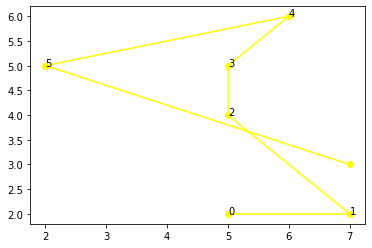


Solusi terbaik pada populasi akhir
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


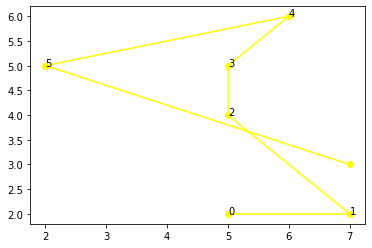

In [14]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):

    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm, popc)

    popAll = sort(popAll)

    pop = elimination(popAll)

    print()
    print('Solusi terbaik pada populasi generasi ke-'+ str(i))
    print(pop.head(1))
    plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)

In [15]:
# datasaja = pop.drop(columns=['fitness']) #fitness dibuang karena agar nanti saat memasukkan ke populasi pada pelatihan selanjutnya tidak kelebihan

In [16]:
# datasaja.to_csv("weight.csv", index=False) 
pop.to_csv("weight.csv", index=False) 

In [17]:
# from google.colab import files
# files.download('/content/weight.csv')

Solusi terbaik pada populasi akhir
   0  1  2  3  4  5  fitness
0  3  0  2  5  4  1       14


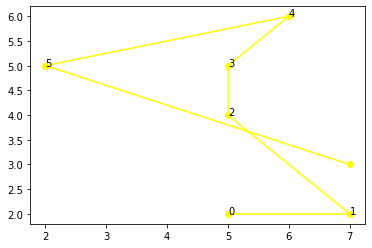

In [18]:
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)

In [19]:
# x = np.array([7 ,2  , 5 , 5 , 6 , 5 ])
# y = np.array([2 ,5  , 4 , 2,  6 , 5])
# anotasi = ["0","1","2","3","4","5"]